# Analysis by Machine Learning

The UN’s Framework for the Immediate Socio-Economic Response to the COVID 19 Crisis warns that “The COVID-19 pandemic is far more than a health crisis: it is affecting societies and economies at their core. While the impact of the pandemic will vary from county to county, it will most likely increase poverty and inequalities at a state to country scale.

In this Jupyter Notebook, we will use a dataset which has been constructed from data about Median Household Income, Poverty, Unemployment and COVID cases and deaths in USA at state and county level from 6 datasets from census.gov and usda.gov.  This analysis will perform machine learning analysis.

In [1]:
# Data Manipulation 
import numpy as np
import pandas as pd
import math

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Feature Selection and Encoding
from sklearn.feature_selection import RFE, RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

In [3]:
# Retrieve and load data

data = pd.read_csv("data.csv")
data_df = data.drop(["County", "Confirmed cases", "Confirmed Deaths"], axis=1)


data_df.head()

,State,FIPS,Population 2018,Median Household Income 2018 ($),Unemployment Rate 2018 (%),Poverty Rate 2018 (%),Confirmed cases per 100K people,Deaths per 100K people,Mortality Rate (%),White (%),Black (%),Native American (%),Asian (%),Hispanic (%),Dropout (%),High School Diploma (%),Some College/Associate's Degree (%),Bachelor's Degree or Higher (%)
0,Alabama,1001,55533,59338,3.6,13.8,477.193741,9.003655,1.886792,76.725239,19.630942,0.480207,1.224798,2.965774,11.3,32.6,28.4,27.7
1,Alabama,1003,217855,57588,3.6,9.8,143.673544,4.131188,2.875399,87.285228,8.940382,0.772399,1.150343,4.646779,9.7,27.6,31.3,31.3
2,Alabama,1005,24872,34382,5.1,30.9,775.972982,4.020585,0.518135,49.069571,48.398376,0.659137,0.454162,4.276355,27.0,35.7,25.1,12.2
3,Alabama,1007,22367,46064,3.9,21.8,344.257165,4.470872,1.298701,76.834821,21.294643,0.437500,0.236607,2.625000,16.8,47.3,24.4,11.5
4,Alabama,1009,57771,50412,3.5,13.2,124.630005,1.730972,1.388889,95.878285,1.642462,0.653527,0.319848,9.571231,19.8,34.0,33.5,12.6


In [4]:
# describe data

data_df.describe()

,FIPS,Population 2018,Median Household Income 2018 ($),Unemployment Rate 2018 (%),Poverty Rate 2018 (%),Confirmed cases per 100K people,Deaths per 100K people,Mortality Rate (%),White (%),Black (%),Native American (%),Asian (%),Hispanic (%),Dropout (%),High School Diploma (%),Some College/Associate's Degree (%),Bachelor's Degree or Higher (%)
count,2959.000000,2.959000e+03,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000
mean,30267.689084,1.076076e+05,52907.030416,4.138560,15.220953,372.359139,14.694736,3.465992,84.229755,9.784947,2.187493,1.571278,9.614081,13.531869,34.284589,30.560088,21.622237
std,15216.579589,3.355405e+05,14025.941509,1.442719,6.174689,699.561070,37.744558,5.302961,16.255690,14.710205,7.267710,2.783350,13.748744,6.244929,7.212705,5.055190,9.545845
min,1001.000000,4.620000e+02,25385.000000,1.300000,2.600000,0.000000,0.000000,0.000000,5.325320,0.000000,0.000000,0.000000,0.610451,1.200000,5.500000,11.400000,5.400000
25%,18142.000000,1.269400e+04,43665.000000,3.200000,10.800000,73.109274,0.000000,0.000000,78.903678,0.935071,0.377409,0.474314,2.403604,8.850000,29.900000,27.200000,14.900000
50%,29111.000000,2.820400e+04,50587.000000,3.900000,14.200000,172.516546,3.337249,1.754386,90.911038,2.855236,0.615064,0.758277,4.430390,12.200000,34.600000,30.500000,19.200000
75%,45058.000000,7.313150e+04,59011.500000,4.800000,18.400000,400.250881,14.105873,5.225722,95.414974,11.683090,1.269921,1.478203,9.998449,17.400000,39.300000,34.000000,25.800000
max,56045.000000,1.007391e+07,140382.000000,18.900000,54.000000,12704.850360,1340.900092,100.000000,99.043785,86.069762,92.515200,42.952310,96.359551,48.500000,55.600000,48.000000,78.500000


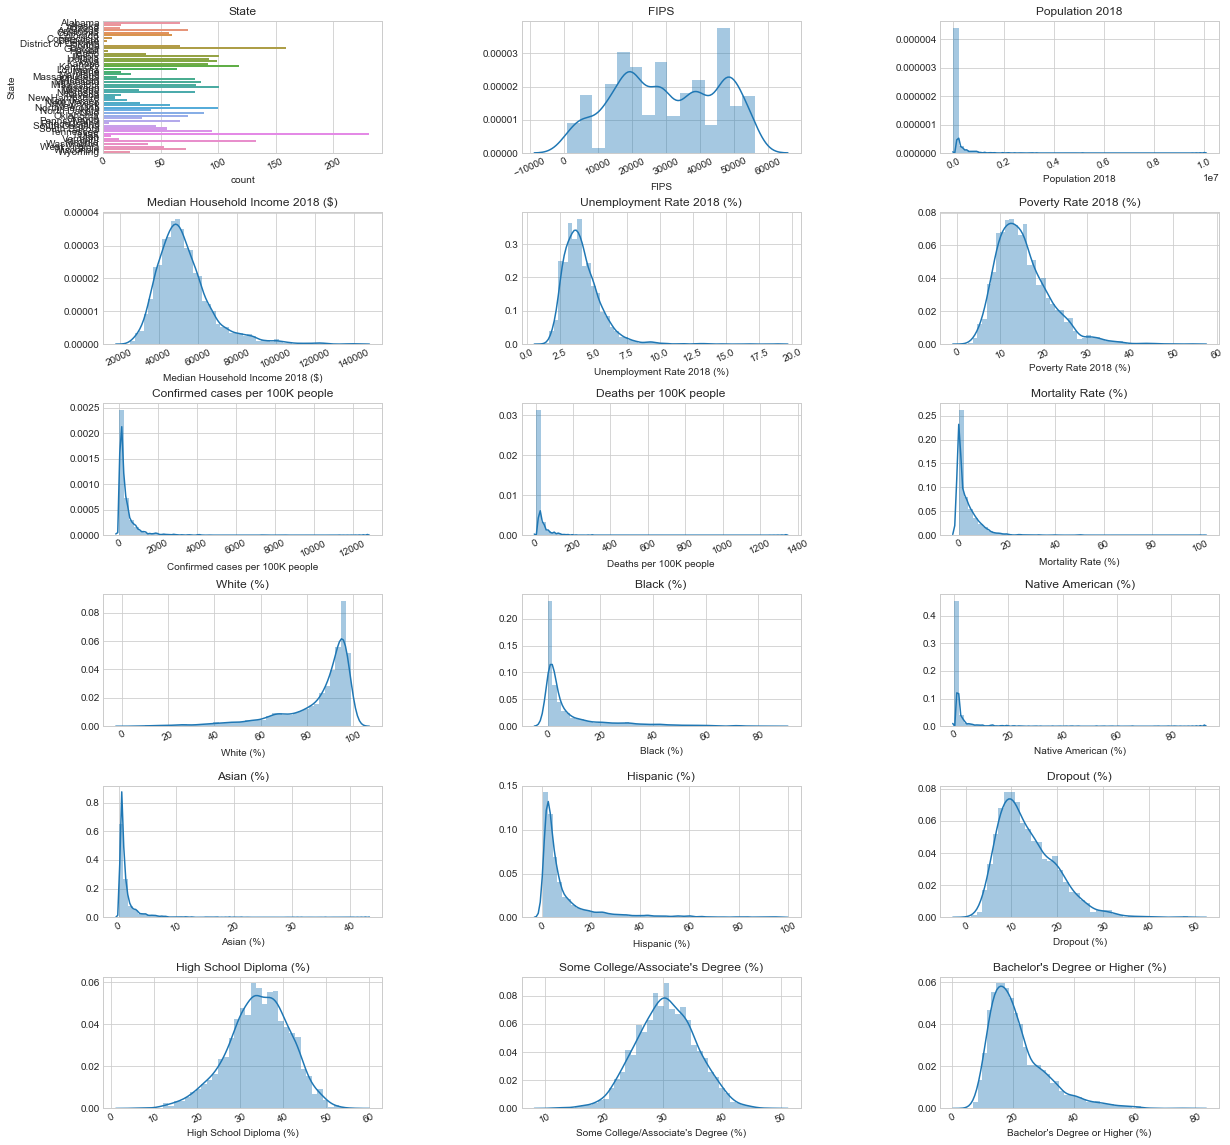

In [5]:
# Let’s plot the distribution of each feature
def plot_distribution(data_df, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(data_df.shape[1]) / cols)
    for i, column in enumerate(data_df.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if data_df.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=data_df)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(data_df[column])
            plt.xticks(rotation=25)
            
    
plot_distribution(data_df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)
plt.savefig("Images/ml_features.png")

The above visualizations show the distribution of each feature or variable.

Feature Encoding: 
Machine Learning algorithms perform Linear Algebra on Matrices, which means all features need to have numeric values. The process of converting Categorical Features into values is called Encoding. Let's perform both One-Hot and Label encoding.

In [6]:
#Min-Max normalizes/scales any list
def normalize(input_data):
    return ((np.array(input_data) - min(input_data)) / (max(input_data) - min(input_data)))

In [7]:
# One Hot Encodes all labels before Machine Learning
one_hot_cols = data_df.columns.tolist()
one_hot_cols.remove('State')
data_enc = pd.get_dummies(data_df, columns=one_hot_cols)

data_enc.head()

,State,Unnamed: 0_0,Unnamed: 0_1,Unnamed: 0_2,Unnamed: 0_3,Unnamed: 0_4,Unnamed: 0_5,Unnamed: 0_6,Unnamed: 0_7,Unnamed: 0_8,...,Bachelor Degree or Higher (%)_58.8,Bachelor Degree or Higher (%)_59.0,Bachelor Degree or Higher (%)_60.8,Bachelor Degree or Higher (%)_61.1,Bachelor Degree or Higher (%)_61.4,Bachelor Degree or Higher (%)_62.1,Bachelor Degree or Higher (%)_63.1,Bachelor Degree or Higher (%)_66.5,Bachelor Degree or Higher (%)_74.6,Bachelor Degree or Higher (%)_78.5
0,Alabama,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Alabama,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Alabama,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Alabama,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Alabama,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Encode strings to integers using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = ['State', 'FIPS', 'Population 2018', 'Median Household Income 2018 ($)','Unemployment Rate 2018 (%)', 'Poverty Rate 2018 (%)',
       'Confirmed cases per 100K people', 'Deaths per 100K people','Mortality Rate (%)', 'White (%)', 'Black (%)', 'Native American (%)', 'Asian (%)', 'Hispanic (%)', 'Dropout (%)', 'High School Diploma (%)', 'Some College_Associate Degree (%)', 'Bachelor Degree or Higher (%)']
for col in cols:
    data_df[col] = le.fit_transform(data_df[col])
    
data_df.head()

,Unnamed: 0,State,FIPS,Population 2018,Median Household Income 2018 ($),Unemployment Rate 2018 (%),Poverty Rate 2018 (%),Confirmed cases per 100K people,Deaths per 100K people,Mortality Rate (%),White (%),Black (%),Native American (%),Asian (%),Hispanic (%),Dropout (%),High School Diploma (%),Some College_Associate Degree (%),Bachelor Degree or Higher (%)
0,0,0,0,2003,2153,21,99,2322,833,249,671,2440,1121,2044,1013,88,184,116,202
1,1,0,1,2611,2045,21,59,1288,403,385,1149,2091,1756,1986,1535,72,134,145,238
2,2,0,2,1329,116,36,262,2590,394,36,154,2845,1566,662,1444,243,215,83,47
3,3,0,3,1231,946,24,179,2066,435,160,675,2480,976,144,859,143,331,76,40
4,4,0,4,2031,1400,20,93,1169,88,177,2333,1154,1552,314,2192,173,198,167,51


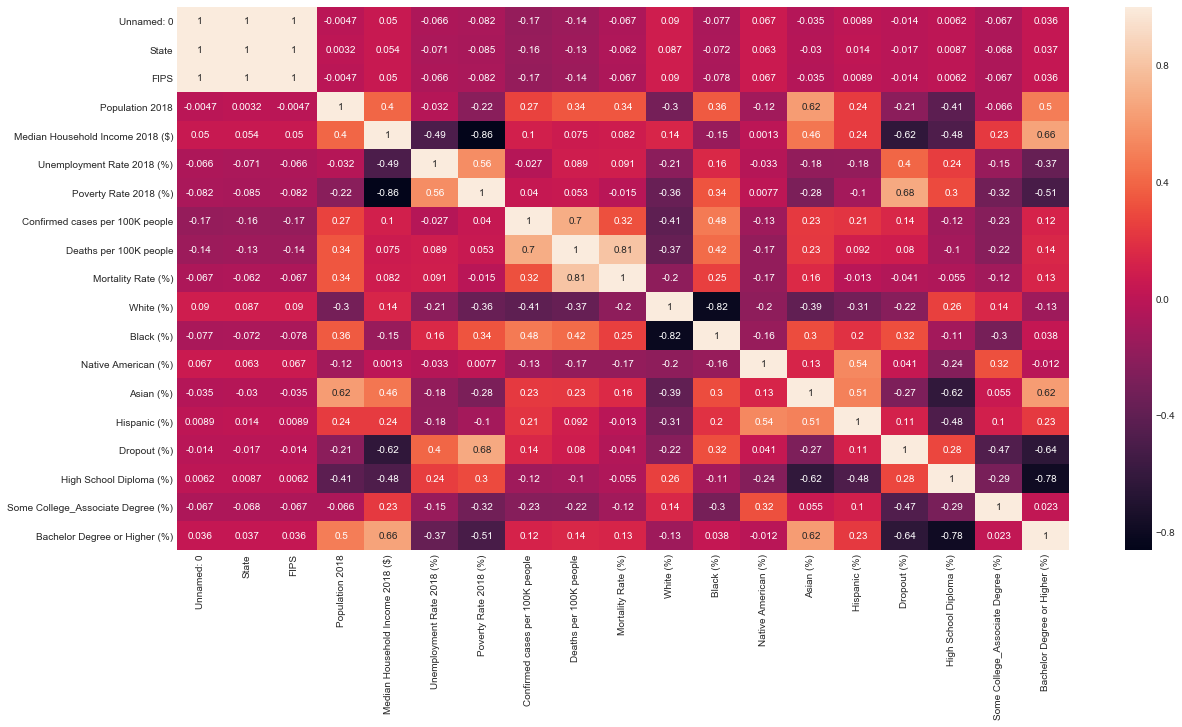

In [9]:
#Correlation among attributes
corr = data_df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr, annot=True)
plt.savefig("Images/corr_attr.png")
plt.show()

Feature Importance:
Random forest consists of a number of decision trees. Every node in the decision trees is a condition on a single feature, designed to split the dataset into two so that similar response values end up in the same set. The measure based on which the (locally) optimal condition is chosen is called impurity. When training a tree, it can be computed by how much each feature decreases the weighted impurity in a tree. For a forest, the impurity decrease from each feature that can be averaged and the features that are ranked according to this measure. This is the feature importance measure exposed in sklearn’s Random Forest implementations.

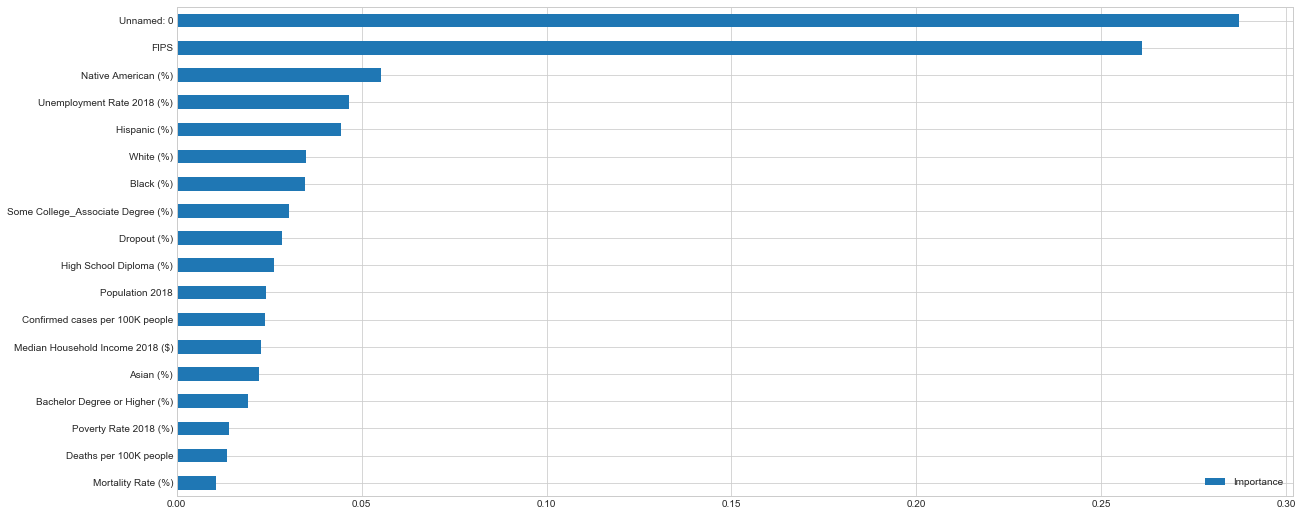

In [10]:
# Using Random Forest to gain an insight on Feature Importance
feats = RandomForestClassifier()
feats.fit(data_df.drop('State', axis=1), data_df['State'])

plt.style.use('seaborn-whitegrid')
importance = feats.feature_importances_
importance = pd.DataFrame(importance, index=data_df.drop('State', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));
plt.savefig("Images/random_forest_feat.png")

PCA:
Principal component analysis (PCA) is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called principal components. This transformation is defined in such a way that the first principal component has the largest possible variance (that is, accounts for as much of the variability in the data as possible), and each succeeding component in turn has the highest variance possible under the constraint that it is orthogonal to the preceding components.

We can use PCA to reduce the number of features to use in our ML algorithms, and graphing the variance gives us an idea of how many features we really need to represent our dataset fully.

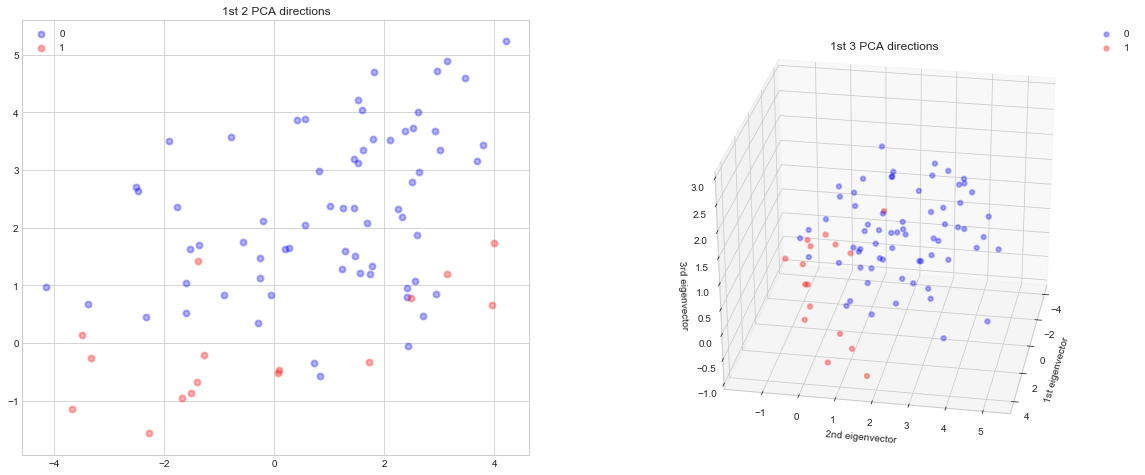

In [11]:
# PCA's components graphed in 2D and 3D
# Apply Scaling 
std_scaling = preprocessing.StandardScaler().fit(data_df.drop('State', axis=1))
X = std_scaling.transform(data_df.drop('State', axis=1))
y = data_df['State']

# Formatting
targets = [0,1]
colors = ['blue','red']
lw = 2
alpha = 0.3
# 2 Components PCA
plt.style.use('seaborn-whitegrid')
plt.figure(2, figsize=(20, 8))

plt.subplot(1, 2, 1)
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
for color, i, target in zip(colors, [0, 1], targets):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], 
                color=color, 
                alpha=alpha, 
                lw=lw,
                label=target)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('1st 2 PCA directions');

# 3 Components PCA
ax = plt.subplot(1, 2, 2, projection='3d')

pca = PCA(n_components=3)
X_reduced = pca.fit(X).transform(X)
for color, i, target_name in zip(colors, [0, 1], targets):
    ax.scatter(X_reduced[y == i, 0], X_reduced[y == i, 1], X_reduced[y == i, 2], 
               color=color,
               alpha=alpha,
               lw=lw, 
               label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
ax.set_title("1st 3 PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")

# rotate the axes
ax.view_init(30, 10)
plt.savefig("Images/PCA.png")

In [12]:
# OPTIONS: 
# - data_enc
# - data_df

# Change the dataset to test how would the algorithms perform under a differently encoded dataset.

selected_data = data_df

selected_data.head(2)

,Unnamed: 0,State,FIPS,Population 2018,Median Household Income 2018 ($),Unemployment Rate 2018 (%),Poverty Rate 2018 (%),Confirmed cases per 100K people,Deaths per 100K people,Mortality Rate (%),White (%),Black (%),Native American (%),Asian (%),Hispanic (%),Dropout (%),High School Diploma (%),Some College_Associate Degree (%),Bachelor Degree or Higher (%)
0,0,0,0,2003,2153,21,99,2322,833,249,671,2440,1121,2044,1013,88,184,116,202
1,1,0,1,2611,2045,21,59,1288,403,385,1149,2091,1756,1986,1535,72,134,145,238


Splitting Data into Training and Testing Datasets:
We need to split the data back into the training and testing datasets. 

In [13]:
# Splitting the Training and Test data sets
train = selected_data.loc[0:2959,:]
test = selected_data.loc[17:,:]

Removing Samples with Missing data:
We could have removed rows with missing data during feature cleaning, but we're choosing to do it at this point. It's easier to do it this way, right after we split the data into Training and Testing. Otherwise we would have had to keep track of the number of deleted rows in our data and take that into account when deciding on a splitting boundary for our joined data.

In [14]:
# Given missing fields are a small percentange of the overall dataset, 
# we have chosen to delete them.
train = train.dropna(axis=0)
test = test.dropna(axis=0)

Rename datasets before we conduct machine learning algorithims

In [15]:
X_train_w_label = train
X_train = train.drop(['State'], axis=1)
y_train = train['State'].astype('int64')
X_test  = test.drop(['State'], axis=1)
y_test  = test['State'].astype('int64')

Machine Learning Algorithms:
Data Review:
Let's take one last peek at our data before we start running the Machine Learning algorithms.

In [16]:
X_train.shape

(2959, 18)

In [17]:

X_train.head()

,Unnamed: 0,FIPS,Population 2018,Median Household Income 2018 ($),Unemployment Rate 2018 (%),Poverty Rate 2018 (%),Confirmed cases per 100K people,Deaths per 100K people,Mortality Rate (%),White (%),Black (%),Native American (%),Asian (%),Hispanic (%),Dropout (%),High School Diploma (%),Some College_Associate Degree (%),Bachelor Degree or Higher (%)
0,0,0,2003,2153,21,99,2322,833,249,671,2440,1121,2044,1013,88,184,116,202
1,1,1,2611,2045,21,59,1288,403,385,1149,2091,1756,1986,1535,72,134,145,238
2,2,2,1329,116,36,262,2590,394,36,154,2845,1566,662,1444,243,215,83,47
3,3,3,1231,946,24,179,2066,435,160,675,2480,976,144,859,143,331,76,40
4,4,4,2031,1400,20,93,1169,88,177,2333,1154,1552,314,2192,173,198,167,51


In [18]:
y_train.head()

0    0
1    0
2    0
3    0
4    0
Name: State, dtype: int64

In [19]:
# Setting a random seed will guarantee we get the same results 
# every time we run our training and testing.

import random

random.seed(1)

We are using supervised machine learning algorithms to predict the data.  The following algorithms are used:

KNN:
Logistic Regression:
Random Forest:
Naive Bayes:
Decision Tree:


In [20]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [21]:
model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)

model.fit(X_train, y_train)

LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [22]:
# Logistic Regression - Random Search for Hyperparameters
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        samples = np.flatnonzero(results['rank_test_score'] == i)
        for sample in samples:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][sample],
                  results['std_test_score'][sample]))
            print("Parameters: {0}".format(results['params'][sample]))
            


In [23]:
# Logistic Regression
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)


Accuracy: 77.09
Accuracy CV 10-Fold: 70.43


The Accuracy score of Logistic Regression is 77.09 which predicts that COVID-19 impacts states and counties at a socio-economic level.  

In [24]:
# Gaussian Naive Bayes

train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)


Accuracy: 98.4
Accuracy CV 10-Fold: 96.79


The model behind Naive Bayes Classifier has something to do with probability distributions. The aim is to maximize the probability of the target class given the x features.  As such, based on our data and analysis, the accuracy score predicts that there is a high chance that COVID-19 impacts the states and counties at a socio-economic level.

In [25]:
print (metrics.classification_report(y_train, train_pred_gaussian))


              precision    recall  f1-score   support

           0       1.00      0.99      0.99        67
           1       1.00      0.94      0.97        16
           2       0.88      1.00      0.94        15
           3       0.99      0.96      0.97        74
           4       0.93      0.96      0.95        57
           5       0.95      0.97      0.96        60
           6       0.88      0.88      0.88         8
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.89      0.96      0.92        67
          10       0.97      0.96      0.97       159
          11       1.00      0.25      0.40         4
          12       0.97      1.00      0.99        37
          13       0.96      0.96      0.96       101
          14       0.93      0.95      0.94        92
          15       0.93      0.91      0.92        99
          16       0.95      0.97      0.96        91
          17       0.99    

In [26]:
print (metrics.classification_report(y_test, test_pred_gaussian))


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        50
           1       1.00      1.00      1.00        16
           2       0.94      1.00      0.97        15
           3       0.99      0.96      0.97        74
           4       0.95      0.96      0.96        57
           5       0.97      0.98      0.98        60
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       0.94      0.99      0.96        67
          10       0.98      0.97      0.97       159
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        37
          13       0.99      0.98      0.99       101
          14       0.98      0.98      0.98        92
          15       0.98      0.97      0.97        99
          16       0.98      1.00      0.99        91
          17       0.99    

In [27]:
# K-Nearest Neighbors
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)

Accuracy: 79.47
Accuracy CV 10-Fold: 60.56


The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.
Our KNN implementation above relies on structured data. It needs to be in a table format. Additionally, the implementation assumes that all columns contain numerical data and that the last column of our data has labels that we can perform some function on.  So, the KNN accuracy score of 79.47 here predicts that the our data and variables are related.  To better explain this, socio-economic factors in our communities are impacted  by COVID-19.

In [28]:
print (metrics.classification_report(y_train, train_pred_knn))


              precision    recall  f1-score   support

           0       0.65      0.76      0.70        67
           1       1.00      0.81      0.90        16
           2       0.28      0.33      0.30        15
           3       0.50      0.61      0.55        74
           4       0.65      0.77      0.70        57
           5       0.66      0.70      0.68        60
           6       0.46      0.75      0.57         8
           7       0.20      0.33      0.25         3
           8       0.00      0.00      0.00         1
           9       0.57      0.60      0.58        67
          10       0.66      0.70      0.68       159
          11       1.00      1.00      1.00         4
          12       0.62      0.43      0.51        37
          13       0.30      0.34      0.32       101
          14       0.40      0.47      0.43        92
          15       0.39      0.37      0.38        99
          16       0.60      0.62      0.61        91
          17       0.59    

In [29]:
print (metrics.classification_report(y_test, test_pred_knn))


              precision    recall  f1-score   support

           0       0.70      0.92      0.79        50
           1       1.00      0.94      0.97        16
           2       0.69      0.73      0.71        15
           3       0.70      0.73      0.72        74
           4       0.86      0.96      0.91        57
           5       0.83      0.88      0.85        60
           6       0.70      0.88      0.78         8
           7       0.40      0.67      0.50         3
           8       0.00      0.00      0.00         1
           9       0.80      0.72      0.76        67
          10       0.81      0.86      0.84       159
          11       1.00      1.00      1.00         4
          12       0.90      0.73      0.81        37
          13       0.61      0.66      0.64       101
          14       0.66      0.74      0.70        92
          15       0.65      0.60      0.62        99
          16       0.80      0.81      0.81        91
          17       0.85    

In [75]:
#Specifying a variable to KNeighborsClassifier
knc = KNeighborsClassifier()

In [31]:
# Ploting and checking error rate for different neighbors
error_rate = []

for i in range(1,40):
    knc = KNeighborsClassifier(n_neighbors=i)
    knc.fit(X_train,y_train)
    pred_i = knc.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

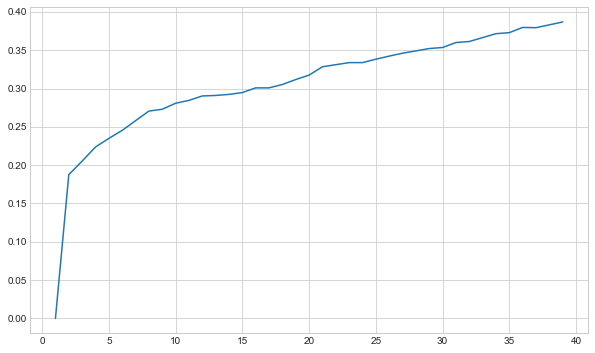

In [32]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)
plt.savefig("Images/KNN_err.png")

In [33]:
# Decision Tree Classifier
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)

Accuracy: 100.0
Accuracy CV 10-Fold: 90.37


Decision Tree algorithms predicts to make decision making easier. A higher accuracy score means that the model is taking into account all variables and predicts a strong relationship between variables.

In [34]:
print (metrics.classification_report(y_train, train_pred_dt))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        67
           1       0.68      0.94      0.79        16
           2       0.93      0.93      0.93        15
           3       0.96      0.91      0.93        74
           4       0.90      0.91      0.90        57
           5       0.95      0.90      0.92        60
           6       0.60      0.75      0.67         8
           7       0.29      0.67      0.40         3
           8       0.00      0.00      0.00         1
           9       0.88      0.91      0.90        67
          10       0.97      0.91      0.94       159
          11       0.25      0.75      0.38         4
          12       0.85      0.92      0.88        37
          13       0.94      0.89      0.91       101
          14       0.89      0.90      0.90        92
          15       0.91      0.91      0.91        99
          16       0.89      0.90      0.90        91
          17       0.93    

In [35]:
print (metrics.classification_report(y_test, test_pred_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        15
           3       1.00      1.00      1.00        74
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        60
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00        67
          10       1.00      1.00      1.00       159
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00        37
          13       1.00      1.00      1.00       101
          14       1.00      1.00      1.00        92
          15       1.00      1.00      1.00        99
          16       1.00      1.00      1.00        91
          17       1.00    

In [36]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        samples = np.flatnonzero(results['rank_test_score'] == i)
        for sample in samples:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][sample],
                  results['std_test_score'][sample]))
            print("Parameters: {0}".format(results['params'][sample]))


In [37]:
# Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)

Accuracy: 99.15
Accuracy CV 10-Fold: 93.38


Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.  Because the accuracy score is high, our data analysis model implies that variables are related and can be highly impacted by each other.

In [38]:
print (metrics.classification_report(y_train, train_pred_rf))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99        67
           1       0.88      0.94      0.91        16
           2       0.92      0.80      0.86        15
           3       0.97      0.97      0.97        74
           4       0.93      0.98      0.96        57
           5       0.92      0.92      0.92        60
           6       0.62      0.62      0.62         8
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.86      0.96      0.91        67
          10       0.98      0.92      0.95       159
          11       1.00      0.75      0.86         4
          12       0.90      1.00      0.95        37
          13       0.92      0.94      0.93       101
          14       0.90      0.90      0.90        92
          15       0.91      0.91      0.91        99
          16       0.90      0.90      0.90        91
          17       0.94    

In [39]:
print (metrics.classification_report(y_test, test_pred_rf))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.89      1.00      0.94        16
           2       1.00      0.87      0.93        15
           3       0.97      1.00      0.99        74
           4       1.00      1.00      1.00        57
           5       0.94      1.00      0.97        60
           6       1.00      0.50      0.67         8
           7       1.00      0.67      0.80         3
           8       0.00      0.00      0.00         1
           9       1.00      0.99      0.99        67
          10       0.98      1.00      0.99       159
          11       1.00      0.50      0.67         4
          12       1.00      1.00      1.00        37
          13       0.99      1.00      1.00       101
          14       1.00      0.99      0.99        92
          15       1.00      1.00      1.00        99
          16       1.00      1.00      1.00        91
          17       1.00    

The combination of the COVID-19 pandemic, a drop in unemployment, increasing number of cases and deaths have the potential to seriously impact stability state and county wide, and will strain public health and social security systems in the short to medium terms.  This analysis uses machine learning models' accuracy scores to predict relationship betwen covid-19 cases/deaths and several socio-economic factors like poverty, household income, unemployment, education and race.  The high accuracy scores of each model indicate that there is a strong relationship and all dependent variables can be highly impacted by changes in independent variables, such as covid-19 cases/deaths.